# Análise Exploratória com Pandas
## Estudando as empresas Listadas na bolsa de Valores B3

In [39]:
import pandas as pd
import pprint
import seaborn as  sns
import matplotlib.pyplot as plt
import re
from unicodedata import normalize

pd.set_option('display.max_columns', None)

## ATIVIDADE 1

1. Importar dados da bolsa
2. Visualizar as primeiras 7 linhas e as últimns 5 do DataFrame.
3. Conferir a quantidade de linhas e colunas do DataFrame
4. Explorar as colunas do DataFrame e analisar tipos dos dados presentes em cada coluna
5. Calcular estatísticas descritivas básicas das principais colunas numéricas do DataFrame
6. Transformar os dados numéricos float

In [2]:
#Leirura do arquivo

data = pd.read_csv("./dados/empresas_bolsas.csv", sep=";")

In [3]:
# 7 primeiras linhas do dataset

data.head(7)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
0,AALR3,"8,45","-3,8","0,98","0,866","0,00%","0,364","-4,47","46,85","-0,92","82,32","12,7","1,85%","-22,10%","0,74","0,91%","-25,92%",1386260,1015110000,"1,04","3,54%","5,47",999576000
1,ABCB3,0,0,0,0,"0,00%",0,0,0,0,0,0,"0,00%","0,00%",0,"0,00%","14,29%",0,5721810000,0,"70,94%",NaN,0
2,ABCB4,"23,85","6,91","0,99",0,"6,31%",0,0,0,0,0,0,"0,00%","0,00%",0,"0,00%","14,29%",13961000,5721810000,0,"70,94%",NaN,5650930000
3,ABEV3,"13,08","13,66","2,28","2,5","5,58%","1,494","55,59","12,12","-23,42","11,3","8,32","20,63%","18,82%","1,11","16,50%","16,71%",280700000,90254900000,"0,04","13,23%","-0,6",206060000000
4,ABYA3,"4,91","-214,8","1,76","2,055","0,00%","0,527","1,98","19,96","-2,75","33,67","33,67","10,29%","-0,96%","2,09","2,78%","-0,82%",0,292060000,"1,31","16,41%","13,7",515088000
5,ACES3,"95,27","8,79","2,28","1,693","0,00%","1,438","6,4","7,2","20,77","6,54","6,54","23,52%","19,27%","2,05","26,90%","25,95%",0,3105800000,"0,09","13,34%","-0,65",7080470000
6,ACES4,"94,73","8,74","2,27","1,683","0,00%","1,43","6,37","7,16","20,65","6,5","6,5","23,52%","19,27%","2,05","26,90%","25,95%",0,3105800000,"0,09","13,34%","-0,65",7040330000


In [4]:
# 5 últimas linhas do dataset

data.tail(5)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
981,WLMM4,27,"9,31","1,47","0,465","3,32%","1,191","2,72","7,7","3,19","6,99","6,75","6,03%","4,99%","4,54","18,34%","15,77%",17755,669898000,"0,01","22,65%","-0,69",983196000
982,WMBY3,"25,39","-19,3","2,87","0,836","0,00%","0,182","1,2","8,62","-1,5","25,02","25,02","9,70%","-7,05%","1,44","2,39%","-14,86%",0,212439000,"6,51","-14,48%","16,4",609360000
983,WSON33,67,"8,07","0,98","1,067","0,00%","0,4","13,41","2,42","-0,89","5,08","5,08","44,14%","13,58%","1,26","18,36%","12,17%",0,2148530000,"1,21","5,23%","2,66",2110500000
984,YDUQ3,"19,28","31,69","1,84","1,187","1,43%","0,608","6,84","7,33","-1,5","12,45","6,42","16,20%","3,80%","1,52","9,69%","5,81%",65311100,3239030000,"1,65","8,98%","2,64",5959240000
985,ZAMP3,"4,98","-11,91","1,03","0,359","0,00%","0,344","51,55","14,42","-0,76","22,4","4,05","2,49%","-3,02%","1,03","2,86%","-8,65%",10630400,1331470000,"0,87","11,28%","1,44",1371270000


In [5]:
# Estrutura do DataFrame

linhas = data.shape[0]
colunas = data.shape[1]
print(f"O DataFrame Possui {linhas} linhas e {colunas} colunas")

O DataFrame Possui 986 linhas e 23 colunas


In [6]:
# Explorando as colunas do DataFrame

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PAPEL                  986 non-null    object
 1   COTAÇÃO                986 non-null    object
 2   P/L                    986 non-null    object
 3   P/VP                   986 non-null    object
 4   PSR                    986 non-null    object
 5   DIV.YIELD              986 non-null    object
 6   P/ATIVO                986 non-null    object
 7   P/CAP.GIRO             986 non-null    object
 8   P/EBIT                 986 non-null    object
 9   P/ATIV CIRC.LIQ        986 non-null    object
 10  EV/EBIT                986 non-null    object
 11  EV/EBITDA              986 non-null    object
 12  MRG EBIT               986 non-null    object
 13  MRG. LÍQ.              986 non-null    object
 14  LIQ. CORR.             986 non-null    object
 15  ROIC                   

### Exploração e tratamento das colunas do dataset

In [7]:
# Identificando as colunas do DataFrame

pp = pprint.PrettyPrinter(indent=4)
colunas_Df = data.columns
pp.pprint(list(colunas_Df))

columns_exclude = [
    'PAPEL',
    'DIV.YIELD',
    'MRG EBIT',
    'MRG. LÍQ.',
    'ROIC',
    'ROE',
    'CRESC. REC.5A',
]

numerical_columns = list(data.columns)

for i in columns_exclude:
    numerical_columns.remove(i)

percentual_number_columns = [
    'DIV.YIELD',
    'MRG EBIT',
    'MRG. LÍQ.',
    'ROIC',
    'ROE',
    'CRESC. REC.5A'
]

[   'PAPEL',
    'COTAÇÃO',
    'P/L',
    'P/VP',
    'PSR',
    'DIV.YIELD',
    'P/ATIVO',
    'P/CAP.GIRO',
    'P/EBIT',
    'P/ATIV CIRC.LIQ',
    'EV/EBIT',
    'EV/EBITDA',
    'MRG EBIT',
    'MRG. LÍQ.',
    'LIQ. CORR.',
    'ROIC',
    'ROE',
    'LIQ.2MESES',
    'PATRIM. LÍQ',
    'DÍV.LÍQ/ PATRIM.',
    'CRESC. REC.5A',
    'DÍVIDA LÍQUIDA/EBITDA',
    'VALOR DE MERCADO']


In [8]:
# transformando os valores percentuais para float

for i in percentual_number_columns:
    data[i] = data[i].str[:-1]
    data[i] = data[i].str.replace(',', '.')

    for j in range(len(data[i])):
        list_index = []
        value = data[i][j]

        for index in range(len(value)):
            if value[index] == '.':
                list_index.append(index)

        new_value = value[:list_index[-1]].replace('.', '') + value[list_index[-1]:]
        data.loc[j, i] = new_value

for i in percentual_number_columns:
    data[i] = data[i].astype('float')
    data[i] = data[i]*0.01

In [9]:
# transformando os dados numéricos em formato de String para tipo Float

for i in numerical_columns:
    if data[i].dtype == 'object':
        data[i] = data[i].str.replace(',', '.')
        data[i] = data[i].astype('float')

In [10]:
data.head(10)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
0,AALR3,8.45,-3.80,0.98,0.866,0.0000,0.364,-4.47,46.85,-0.92,82.32,12.70,0.0185,-0.2210,0.74,0.0091,-0.2592,1386260,1015110000,1.04,0.0354,5.47,999576000
1,ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,0,5721810000,0.00,0.7094,NaN,0
2,ABCB4,23.85,6.91,0.99,0.000,0.0631,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,13961000,5721810000,0.00,0.7094,NaN,5650930000
3,ABEV3,13.08,13.66,2.28,2.500,0.0558,1.494,55.59,12.12,-23.42,11.30,8.32,0.2063,0.1882,1.11,0.1650,0.1671,280700000,90254900000,0.04,0.1323,-0.60,206060000000
4,ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0,292060000,1.31,0.1641,13.70,515088000
5,ACES3,95.27,8.79,2.28,1.693,0.0000,1.438,6.40,7.20,20.77,6.54,6.54,0.2352,0.1927,2.05,0.2690,0.2595,0,3105800000,0.09,0.1334,-0.65,7080470000
6,ACES4,94.73,8.74,2.27,1.683,0.0000,1.430,6.37,7.16,20.65,6.50,6.50,0.2352,0.1927,2.05,0.2690,0.2595,0,3105800000,0.09,0.1334,-0.65,7040330000
7,ADHM3,1.56,-4.09,-1.29,770.924,0.0000,105.126,-1.43,-5.69,-1.27,-5.69,-5.81,-135.4850,-188.6060,0.00,5.2170,0.3147,2064,-19776000,0.00,0.4348,0.00,25440500
8,AEDU3,18.35,59.34,3.32,4.141,0.0000,2.159,17.00,41.06,-21.55,43.27,29.01,0.1008,0.0698,2.04,0.0577,0.0560,0,2415400000,0.30,0.2090,1.48,8020250000
9,AEDU11,37.35,20.13,1.13,1.405,0.0000,0.732,5.77,13.93,-7.31,16.14,10.82,0.1008,0.0698,2.04,0.0577,0.0560,0,2415400000,0.30,0.2090,1.48,2720770000


In [11]:
data.tail(10)

,PAPEL,COTAÇÃO,P/L,P/VP,PSR,DIV.YIELD,P/ATIVO,P/CAP.GIRO,P/EBIT,P/ATIV CIRC.LIQ,EV/EBIT,EV/EBITDA,MRG EBIT,MRG. LÍQ.,LIQ. CORR.,ROIC,ROE,LIQ.2MESES,PATRIM. LÍQ,DÍV.LÍQ/ PATRIM.,CRESC. REC.5A,DÍVIDA LÍQUIDA/EBITDA,VALOR DE MERCADO
976,WHRL4,4.50,18.98,2.64,0.615,0.0832,0.713,11.33,10.18,-48.79,9.21,7.35,0.0604,0.0326,1.10,0.1717,0.1392,104731,2560310000,0.55,0.1298,-0.77,6762540000
977,WISA3,0.20,-0.28,-0.01,0.175,0.0000,0.023,-0.05,-0.25,-0.01,-19.21,-19.21,-0.7141,-0.6275,0.18,-0.0978,0.0239,0,-205386000,-0.52,-0.4866,-18.96,1371200
978,WISA4,0.25,-0.35,-0.01,0.219,0.0000,0.029,-0.06,-0.31,-0.01,-19.27,-19.27,-0.7141,-0.6275,0.18,-0.0978,0.0239,0,-205386000,-0.52,-0.4866,-18.96,1714000
979,WIZC3,6.66,10.95,2.32,1.014,0.0668,0.464,-18.28,2.32,-1.29,2.55,2.02,0.4365,0.1781,0.90,0.2437,0.2118,3428650,459254000,0.77,0.1169,0.18,1064980000
980,WLMM3,24.00,8.27,1.30,0.413,0.0340,1.059,2.42,6.85,2.84,6.13,5.92,0.0603,0.0499,4.54,0.1834,0.1577,1697,669898000,0.01,0.2265,-0.69,873952000
981,WLMM4,27.00,9.31,1.47,0.465,0.0332,1.191,2.72,7.70,3.19,6.99,6.75,0.0603,0.0499,4.54,0.1834,0.1577,17755,669898000,0.01,0.2265,-0.69,983196000
982,WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,1.44,0.0239,-0.1486,0,212439000,6.51,-0.1448,16.40,609360000
983,WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,1.26,0.1836,0.1217,0,2148530000,1.21,0.0523,2.66,2110500000
984,YDUQ3,19.28,31.69,1.84,1.187,0.0143,0.608,6.84,7.33,-1.50,12.45,6.42,0.1620,0.0380,1.52,0.0969,0.0581,65311100,3239030000,1.65,0.0898,2.64,5959240000
985,ZAMP3,4.98,-11.91,1.03,0.359,0.0000,0.344,51.55,14.42,-0.76,22.40,4.05,0.0249,-0.0302,1.03,0.0286,-0.0865,10630400,1331470000,0.87,0.1128,1.44,1371270000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PAPEL                  986 non-null    object 
 1   COTAÇÃO                986 non-null    float64
 2   P/L                    986 non-null    float64
 3   P/VP                   986 non-null    float64
 4   PSR                    986 non-null    float64
 5   DIV.YIELD              986 non-null    float64
 6   P/ATIVO                986 non-null    float64
 7   P/CAP.GIRO             986 non-null    float64
 8   P/EBIT                 986 non-null    float64
 9   P/ATIV CIRC.LIQ        986 non-null    float64
 10  EV/EBIT                986 non-null    float64
 11  EV/EBITDA              986 non-null    float64
 12  MRG EBIT               986 non-null    float64
 13  MRG. LÍQ.              986 non-null    float64
 14  LIQ. CORR.             986 non-null    float64
 15  ROIC  

In [13]:
# preenchendo valores ausentes com Zero

data.fillna(value=0, inplace=True)
data.isna().sum()

PAPEL                    0
COTAÇÃO                  0
P/L                      0
P/VP                     0
PSR                      0
DIV.YIELD                0
P/ATIVO                  0
P/CAP.GIRO               0
P/EBIT                   0
P/ATIV CIRC.LIQ          0
EV/EBIT                  0
EV/EBITDA                0
MRG EBIT                 0
MRG. LÍQ.                0
LIQ. CORR.               0
ROIC                     0
ROE                      0
LIQ.2MESES               0
PATRIM. LÍQ              0
DÍV.LÍQ/ PATRIM.         0
CRESC. REC.5A            0
DÍVIDA LÍQUIDA/EBITDA    0
VALOR DE MERCADO         0
dtype: int64

In [14]:
# Buscando Valores ausentes na tabela

data.isna().sum()

PAPEL                    0
COTAÇÃO                  0
P/L                      0
P/VP                     0
PSR                      0
DIV.YIELD                0
P/ATIVO                  0
P/CAP.GIRO               0
P/EBIT                   0
P/ATIV CIRC.LIQ          0
EV/EBIT                  0
EV/EBITDA                0
MRG EBIT                 0
MRG. LÍQ.                0
LIQ. CORR.               0
ROIC                     0
ROE                      0
LIQ.2MESES               0
PATRIM. LÍQ              0
DÍV.LÍQ/ PATRIM.         0
CRESC. REC.5A            0
DÍVIDA LÍQUIDA/EBITDA    0
VALOR DE MERCADO         0
dtype: int64

In [15]:

def format_column_names(text):
    
    string_step1 = text.replace(".", "_")
    string_step2 = string_step1.replace(' ', "_")
    string_step3 = string_step2.replace('/', '_')
    string_step4 = string_step3.replace('__', '_')

    if '_' == string_step4[-1]:
        return normalize('NFKD', string_step4[:-1]).encode('ASCII', 'ignore').decode('ASCII')
    else:
        return normalize('NFKD', string_step4).encode('ASCII', 'ignore').decode('ASCII')

In [16]:
# Ajustes dos nomes das colunas

columns = list(data.columns)
new_columns = {col: format_column_names(col) for col in columns}
data.rename(columns=new_columns, inplace=True)
data.head()

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_LIQ_PATRIM,CRESC_REC_5A,DIVIDA_LIQUIDA_EBITDA,VALOR_DE_MERCADO
0,AALR3,8.45,-3.80,0.98,0.866,0.0000,0.364,-4.47,46.85,-0.92,82.32,12.70,0.0185,-0.2210,0.74,0.0091,-0.2592,1386260,1015110000,1.04,0.0354,5.47,999576000
1,ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,0,5721810000,0.00,0.7094,0.00,0
2,ABCB4,23.85,6.91,0.99,0.000,0.0631,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,13961000,5721810000,0.00,0.7094,0.00,5650930000
3,ABEV3,13.08,13.66,2.28,2.500,0.0558,1.494,55.59,12.12,-23.42,11.30,8.32,0.2063,0.1882,1.11,0.1650,0.1671,280700000,90254900000,0.04,0.1323,-0.60,206060000000
4,ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0,292060000,1.31,0.1641,13.70,515088000


### Estatísticas descritivas das principais Colunas

| Parâmetro | Significado |
|-------------|-------------|
| count | quantidade de valores|
| mean | média dos valores | 
| std | desvio padrão |
| min | valor mínimo do conjunto|
| 25% | 1º **quartil**|
| 50% |2º **quartil**|
| 75% |3ª **quartil**|
| max | valor máximo do conjunto |

NOTA: [QUARTIL](https://www.respondeai.com.br/conteudo/probabilidade-e-estatistica/estatistica/1-2-e-3-quartil-e-distancia-interquartil/862#:~:text=1%C2%BA%20quartil%2C%20%C3%A9%20o%20valor%20da%20posi%C3%A7%C3%A3o%20central,caminho%20entre%20a%20mediana%20e%20o%20%C3%BAltimo%20termo.)


#### Dividendos

In [17]:
data["DIV_YIELD"].describe()

count    986.000000
mean       0.354869
std        8.832740
min        0.000000
25%        0.000000
50%        0.000000
75%        0.017400
max      274.928000
Name: DIV_YIELD, dtype: float64

#### Preço/Lucro

In [18]:
data['P_L'].describe()

count     986.000000
mean        2.312972
std       153.287128
min     -3584.820000
25%        -0.257500
50%         4.630000
75%        12.830000
max      1466.610000
Name: P_L, dtype: float64

#### Preço de Mercado / Valor Patrimonial

In [19]:
data['P_VP'].describe()

count       986.000000
mean       1473.980061
std       31901.496188
min        -359.150000
25%           0.202500
50%           1.090000
75%           2.067500
max      723708.000000
Name: P_VP, dtype: float64

#### ROE

In [20]:
data['ROE'].describe()

count      986.000000
mean        27.239532
std        613.701241
min       -119.207000
25%          0.000000
50%          0.089250
75%          0.201100
max      13632.000000
Name: ROE, dtype: float64

#### CRESCIMENTO DE RECEITA 5 ANOS

In [21]:
data['CRESC_REC_5A'].describe()

count    986.000000
mean       0.244691
std        2.876220
min       -0.870300
25%        0.004925
50%        0.109400
75%        0.206700
max       63.540700
Name: CRESC_REC_5A, dtype: float64

#### LIQUIDEZ CORRENTE

In [22]:
data['LIQ_CORR'].describe()

count    986.000000
mean       1.833195
std        4.340060
min        0.000000
25%        0.462500
50%        1.155000
75%        1.997500
max       66.470000
Name: LIQ_CORR, dtype: float64

## ATIVIDADE 2

1. Analisar Dividend Yields das empresas
2. Calcular a média do *DIVIDEND YIELD* das empresas com *MARGEM LÍQUIDA* ACIMA DE 10%
3. Verificar percentual de empresas pagadoras de dividendos que tem P/L acima de 4.
4. Analisar quais empresas tem *LIQUIDEZ CORRENTE* acima de 1, TEM *ROE* acima da média das empreas e *DIVIDEND YIELD* maior ou igual a 6.
5. Criar Gráfico de Barra Horizontal com as 5 primeiras empresas, resultantes da análise anterior

### Análise dos dividendos das Empresas

#### Distribuição dos valores de DIVIDEND YIELD das empresas

/home/maercio/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histograma dos dividendos das empresas')

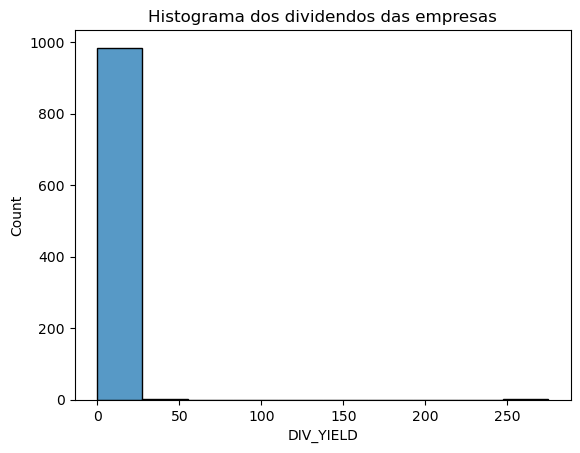

In [46]:
# Histograma com todos os dados da coluna DIV_YIELD

sns.histplot(data['DIV_YIELD'], bins=10)
plt.title('Histograma dos dividendos das empresas')

Text(0.5, 1.0, 'Distribuição dos valores de Dividend Yields das Empresas')

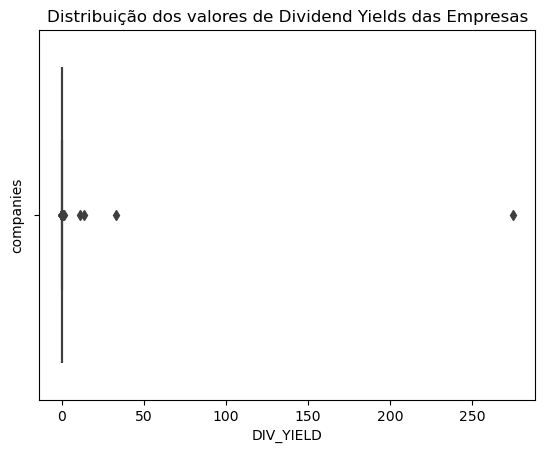

In [57]:
# Boxplot com todos os dados da coluna DIV_YIELD

sns.boxplot(x='DIV_YIELD', data=data.sort_values(by='DIV_YIELD'))
plt.ylabel('companies')
plt.title('Distribuição dos valores de Dividend Yields das Empresas')


#### Empresas com  DIVIDEND YIELD IGUAL A ZERO

In [54]:
companies_zero_div = data.query('DIV_YIELD == 0')
num_companies_zero_div = companies_zero_div.shape[0]
companies_total =data.shape[0]
print(companies_zero_div[['PAPEL', 'DIV_YIELD']])   
print('\033[31m' +"\U000026A0{:.2f}% das empresas da base de dados têm diviend yield igual à zero".format((num_companies_zero_div/companies_total)*100))

      PAPEL  DIV_YIELD
0     AALR3        0.0
1     ABCB3        0.0
4     ABYA3        0.0
5     ACES3        0.0
6     ACES4        0.0
..      ...        ...
977   WISA3        0.0
978   WISA4        0.0
982   WMBY3        0.0
983  WSON33        0.0
985   ZAMP3        0.0

[668 rows x 2 columns]
⚠67.75% das empresas da base de dados têm diviend yield igual à zero


#### Empresas TOP 10 em relação do DIVIDEND YIELD

In [104]:
data[['PAPEL','DIV_YIELD']].sort_values(by='DIV_YIELD', ascending=False).head(10)

,PAPEL,DIV_YIELD
385,EPAR3,274.9280
167,BRPR3,32.9944
180,BSLI4,13.2222
179,BSLI3,10.9403
911,TRPN3,1.0474
145,BPAT33,0.3572
542,LEVE3,0.2748
68,AURE3,0.2276
459,GRND3,0.2049
672,PETR4,0.1792


#### Empresas com dividend yield menor que 1 e maior que zero

In [56]:
dividend_clean = data.query('DIV_YIELD < 1 and DIV_YIELD > 0')
dividend_clean['DIV_YIELD'].describe()

count    313.000000
mean       0.053574
std        0.045955
min        0.001100
25%        0.019700
50%        0.044700
75%        0.071500
max        0.357200
Name: DIV_YIELD, dtype: float64

Text(0.5, 1.0, 'Distribuição dos valores de Dividend Yields das Empresas')

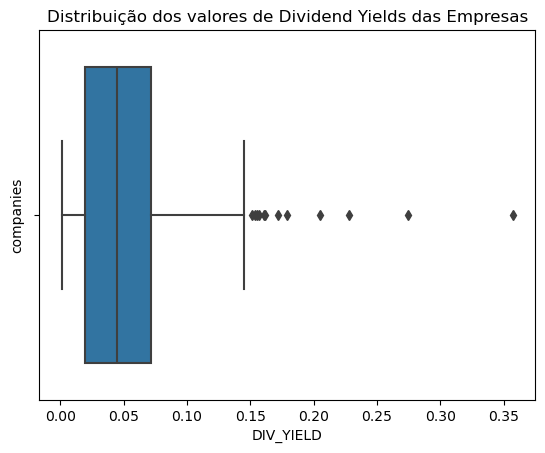

In [58]:
sns.boxplot(x='DIV_YIELD', data=dividend_clean)
plt.ylabel('companies')
plt.title('Distribuição dos valores de Dividend Yields das Empresas')

#### DIVIDEND YIELD das empresas com MARGEM LÍQUIDA MAIOR QUE 10%

In [59]:
dividend_top = dividend_clean.query("MRG_LIQ > 0.1")
dividend_top['DIV_YIELD'].describe()

count    155.000000
mean       0.061381
std        0.047555
min        0.001200
25%        0.027600
50%        0.054100
75%        0.082950
max        0.274800
Name: DIV_YIELD, dtype: float64

/home/maercio/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'dividend yield')

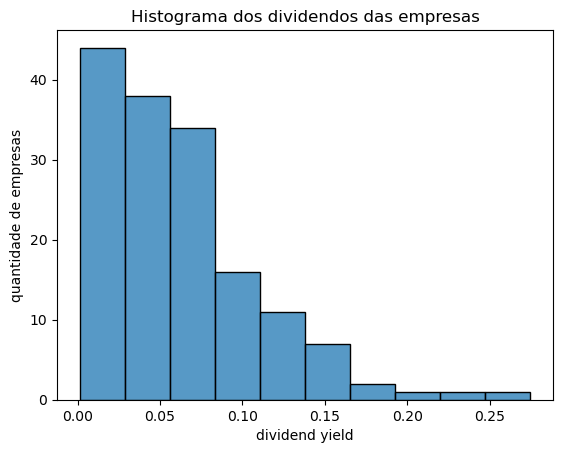

In [63]:
sns.histplot(dividend_top['DIV_YIELD'], bins=10)
plt.title('Histograma dos dividendos das empresas')
plt.ylabel('quantidade de empresas')
plt.xlabel('dividend yield')

In [106]:
dividend_top['MRG_LIQ'].describe()

count    155.000000
mean       0.857167
std        3.255533
min        0.101300
25%        0.134850
50%        0.184000
75%        0.256400
max       20.395800
Name: MRG_LIQ, dtype: float64

/home/maercio/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'MARGEM LÍQUIDA')

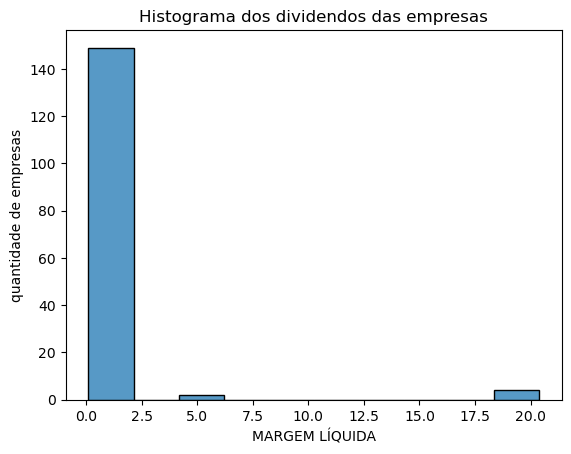

In [105]:
sns.histplot(dividend_top['MRG_LIQ'], bins=10)
plt.title('Histograma dos dividendos das empresas')
plt.ylabel('quantidade de empresas')
plt.xlabel('MARGEM LÍQUIDA')

<Axes: xlabel='MRG_LIQ'>

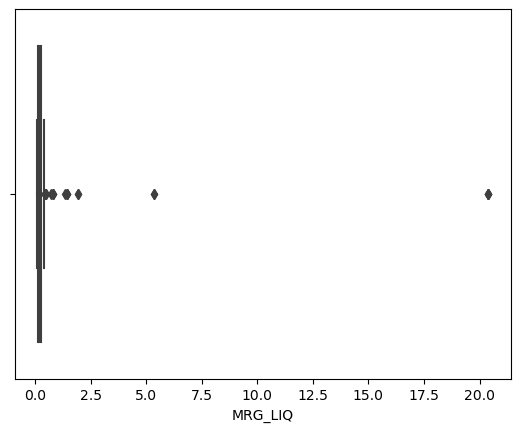

In [107]:
sns.boxplot(x=dividend_top['MRG_LIQ'])

In [109]:
dividend_top[['PAPEL', 'DIV_YIELD', 'MRG_LIQ']].sort_values(by='MRG_LIQ', ascending=False)

,PAPEL,DIV_YIELD,MRG_LIQ
155,BRGE6,0.0221,20.3958
158,BRGE11,0.0110,20.3958
157,BRGE8,0.0091,20.3958
156,BRGE7,0.0129,20.3958
275,CSAB4,0.0135,5.3453
...,...,...,...
354,EKTR3,0.1151,0.1041
404,EUCA4,0.0568,0.1036
403,EUCA3,0.0472,0.1036
878,TKNO4,0.0625,0.1030


#### Percentual das empresas pagadoras de dividendos que possuem P/L maior que 4

In [66]:
df_PL_company = dividend_clean.query("P_L > 4")
percentual_company = (df_PL_company.shape[0]/data.shape[0])*100
print( '\033[31m' + "\U000026A0 {:.2f}% das empresas pagadores de dividendos tem P/L maior que 4".format(percentual_company, 2))

df_PL_company['P_L'].describe()

⚠ 28.30% das empresas pagadores de dividendos tem P/L maior que 4


count    279.000000
mean      17.752724
std       23.469628
min        4.020000
25%        7.475000
50%       10.480000
75%       18.075000
max      196.400000
Name: P_L, dtype: float64

In [114]:
df_PL_company[['PAPEL', 'DIV_YIELD', 'MRG_LIQ', 'P_L']].sort_values(by='P_L', ascending=False)

,PAPEL,DIV_YIELD,MRG_LIQ,P_L
579,MERC4,0.0479,0.0000,196.40
191,CASN3,0.0019,0.0381,178.97
661,PATI4,0.0629,0.0028,153.53
660,PATI3,0.0175,0.0028,126.72
803,SIMH3,0.0025,0.0115,126.09
...,...,...,...,...
31,ALOS3,0.0211,1.4469,4.49
448,GGBR3,0.0808,0.1132,4.28
83,BAZA3,0.0613,0.0000,4.24
150,BRAP4,0.1326,0.0000,4.22


/home/maercio/anaconda3/envs/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Preço/Lucro')

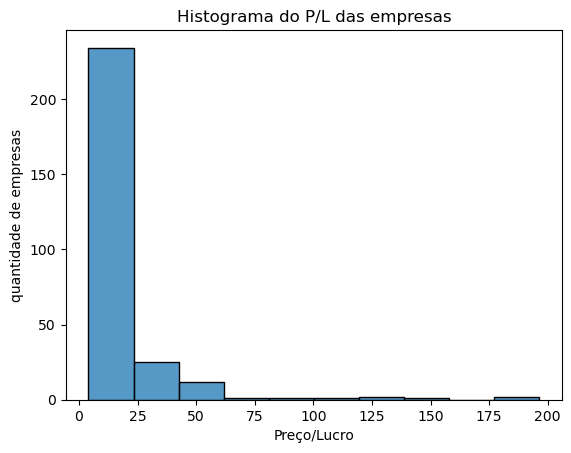

In [112]:
sns.histplot(df_PL_company['P_L'], bins=10)
plt.title('Histograma do P/L das empresas')
plt.ylabel('quantidade de empresas')
plt.xlabel('Preço/Lucro')

#### Média do ROE das empresas pagadoras de dividendos

In [73]:
dividend_average = dividend_clean['ROE']
print(  "\U000026A0 A média do ROE das empresas pagadoras de dividendos é: {:.2f}".format(dividend_average.mean()))
dividend_average.describe()

⚠ A média do ROE das empresas pagadoras de dividendos é: 0.15


count    313.000000
mean       0.149273
std        0.134956
min       -0.246100
25%        0.065800
50%        0.139400
75%        0.208100
max        0.791800
Name: ROE, dtype: float64

#### Empresas pagadoras de dividendo com *LIQUIDEZ CORRENTE* acima de 1, e *ROE* acima da média.

In [75]:
company_top = dividend_clean.query(f"ROE > {dividend_average.mean()} and ")
company_top

,PAPEL,COTACAO,P_L,P_VP,PSR,DIV_YIELD,P_ATIVO,P_CAP_GIRO,P_EBIT,P_ATIV_CIRC_LIQ,EV_EBIT,EV_EBITDA,MRG_EBIT,MRG_LIQ,LIQ_CORR,ROIC,ROE,LIQ_2MESES,PATRIM_LIQ,DIV_LIQ_PATRIM,CRESC_REC_5A,DIVIDA_LIQUIDA_EBITDA,VALOR_DE_MERCADO
3,ABEV3,13.08,13.66,2.28,2.500,0.0558,1.494,55.59,12.12,-23.42,11.30,8.32,0.2063,0.1882,1.11,0.1650,0.1671,280700000,90254900000,0.04,0.1323,-0.60,206060000000
31,ALOS3,24.55,4.49,0.96,6.298,0.0211,0.504,13.73,13.74,-1.51,12.14,7.77,0.4585,1.4469,1.58,0.0390,0.2132,109039000,14703000000,0.00,0.3727,-1.02,14090200000
61,ASAI3,13.66,22.55,4.27,0.288,0.0037,0.447,-5.41,4.27,-0.78,6.51,4.94,0.0675,0.0128,0.79,0.1752,0.1894,154638000,4325000000,3.26,0.5877,1.70,18466000000
67,AURA33,32.25,8.91,1.34,1.129,0.0606,0.541,3.60,3.80,-2.53,4.80,4.80,0.2971,0.1267,1.64,0.2059,0.1508,1781550,1697640000,0.88,0.2695,1.00,2281440000
75,B3SA3,13.09,17.51,3.65,7.038,0.0337,1.544,13.55,13.67,-7.10,13.05,10.90,0.5148,0.4019,1.46,0.1652,0.2086,445568000,20233800000,0.57,0.1448,-0.52,73912700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,VULC3,18.82,8.20,2.33,1.674,0.0497,1.653,3.05,9.32,4.03,9.35,7.83,0.1795,0.2041,4.39,0.2168,0.2843,13516400,1985350000,0.19,0.2513,0.02,4628140000
972,WEGE3,32.34,26.21,8.42,4.252,0.0190,4.513,14.11,19.51,18.67,19.09,17.54,0.2180,0.1660,1.86,0.3156,0.3213,180305000,16123000000,0.18,0.2710,-0.38,135741000000
979,WIZC3,6.66,10.95,2.32,1.014,0.0668,0.464,-18.28,2.32,-1.29,2.55,2.02,0.4365,0.1781,0.90,0.2437,0.2118,3428650,459254000,0.77,0.1169,0.18,1064980000
980,WLMM3,24.00,8.27,1.30,0.413,0.0340,1.059,2.42,6.85,2.84,6.13,5.92,0.0603,0.0499,4.54,0.1834,0.1577,1697,669898000,0.01,0.2265,-0.69,873952000


##### Estatísticas descritivas das empresas pagadores de dividendos 

In [99]:
company_top['DIV_YIELD'].describe()

count    140.000000
mean       0.062706
std        0.042398
min        0.001600
25%        0.029975
50%        0.054950
75%        0.080825
max        0.274800
Name: DIV_YIELD, dtype: float64

Text(0.5, 1.0, 'Distribuição dos valores de Dividend Yields das Empresas')

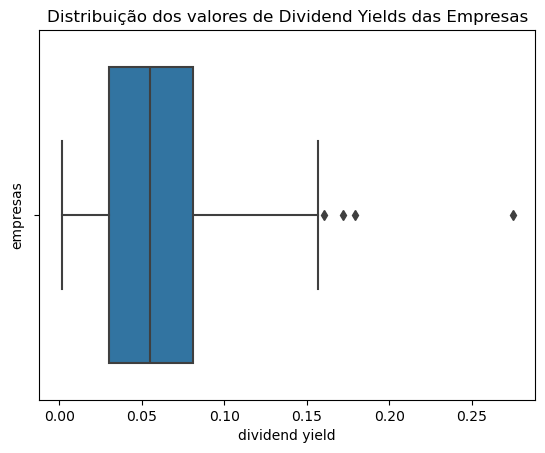

In [96]:
sns.boxplot(x=company_top['DIV_YIELD'])
plt.ylabel('empresas')
plt.xlabel('dividend yield')
plt.title('Distribuição dos valores de Dividend Yields das Empresas')

In [84]:
company_top['ROE'].describe()

count    140.000000
mean       0.256845
std        0.121934
min        0.149900
25%        0.177200
50%        0.212500
75%        0.280850
max        0.791800
Name: ROE, dtype: float64

Text(0.5, 1.0, 'Distribuição dos valores do ROE das Empresas')

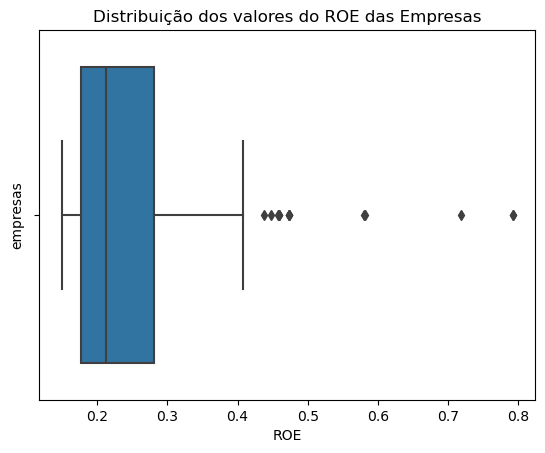

In [98]:
sns.boxplot(x=company_top['ROE'])
plt.ylabel('empresas')
plt.xlabel('ROE')
plt.title('Distribuição dos valores do ROE das Empresas')

<Axes: >

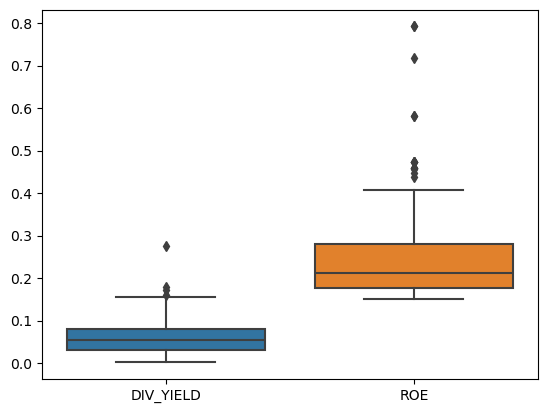

In [101]:
sns.boxplot(data=company_top[['DIV_YIELD','ROE']])

In [103]:
# Analisando valores do ROEs das empresas

company_top[['PAPEL','ROE', 'DIV_YIELD', 'LIQ_CORR']].sort_values(by='DIV_YIELD', ascending=False)

,PAPEL,ROE,DIV_YIELD,LIQ_CORR
542,LEVE3,0.4573,0.2748,1.91
672,PETR4,0.3547,0.1792,0.95
671,PETR3,0.3547,0.1719,0.95
455,GOAU4,0.1529,0.1606,3.02
454,GOAU3,0.1529,0.1567,3.02
...,...,...,...,...
949,VIVA3,0.2040,0.0108,3.01
348,ECOR3,0.2034,0.0092,0.81
963,VSTE3,0.2313,0.0064,1.48
61,ASAI3,0.1894,0.0037,0.79


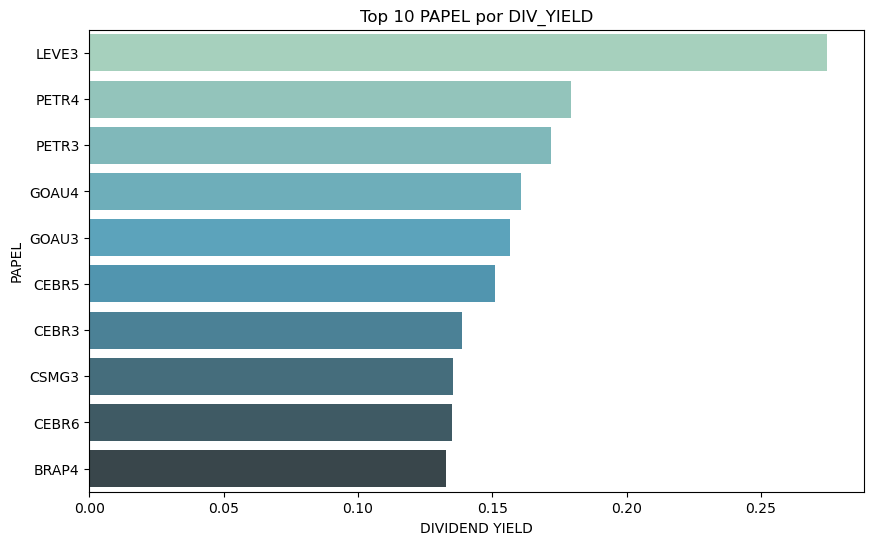

In [95]:
# Ordenando o DataFrame com base em 'DIV_YIELD' em ordem decrescente
data_sorted = company_top[['PAPEL','ROE', 'DIV_YIELD']].sort_values(by='DIV_YIELD',ascending=False)

# Selecionando as primeiras 10 linhas
data_top10 = data_sorted.head(10)

# Criando o gráfico de barras para os 10 maiores valores de 'DIV_YIELD'
plt.figure(figsize=(10,6))
sns.barplot(x='DIV_YIELD', y='PAPEL', data=data_top10, palette="GnBu_d")
plt.title('Top 10 PAPEL por DIV_YIELD')
plt.xlabel('DIVIDEND YIELD')
plt.ylabel('PAPEL')
plt.show()
